In [19]:
# Imports libraries

# Importing data analysis libraries

import pandas as pd
import matplotlib.pyplot as plt

# Importing libraries for ipywidgets

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

In [2]:
# Reads the data from the csv file and displays it

pd.set_option('display.max.rows', None)
df = pd.read_csv("food_nutrients.csv")
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


Here we can see that the data contains "t" and "t'" entries in the nutrient columns. This represents trace amounts. For this project, we will assume that it is 0.

Note that if we look at the 'grams' columns, we also see that commas appear to denote thousands. This inteferes with our conversion of the column into a numerical data type so we will replace this with nothing.

In [23]:
# Selects the desired columns (Could print this to double check)

columns = df.columns[2:9]
# print(columns)


# Replaces the trace amounts with 0

df[columns] = df[columns].replace("t'","0", regex=True)
df[columns] = df[columns].replace("t","0", regex=True)


# Replaces the commas in numerical columns (so that it can be converted from string)

df[columns] = df[columns].replace(",","", regex=True)

# df

C:\Users\matte\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
# Converts the above columns into numerical data types

for col in range (2,9):
    df[df.columns[col]]=pd.to_numeric(df[df.columns[col]])


# Here we are double checking by printing a list of the data types

df.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [25]:
# Printing some properties of the dataframe
# Note that with isnull(), we see that some null values so we can drop them

print(df.isnull().any())
print(df.describe())


# Dropping the null entries and double checking

df=df.dropna()
print(df.isnull().any())

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool
             Grams    Calories     Protein         Fat     Sat.Fat  \
count   332.000000  332.000000  332.000000  332.000000  332.000000   
mean    143.527108  202.631010    7.931821   10.831680    7.421826   
std     139.194736  188.086063   12.675121   20.808480   15.949412   
min      11.000000    0.000000   -1.666667    0.000000    0.000000   
25%      60.000000   51.519512    0.537088    0.000000    0.000000   
50%     108.000000  140.454545    3.000000    1.188235    0.000000   
75%     200.000000  303.244871   10.666667   10.917832    7.958090   
max    1419.000000  901.818182  101.785714  102.678571  103.571429   

            Fiber       Carbs  
count  332.000000  332.000000  
mean     1.703993   22.312434  
std     10.068774   26.790352  
min      0.000000    0.000000  
25%      0.000000

Now we need to standardise the data by making the nutrients per 100g.

In [9]:
# Dividing the nutrients but their weight to get nutrients per unit gram and then multiplying by 100

for col in range (3,9):
    df[df.columns[col]] = (df[df.columns[col]] / df['Grams']) * 100


# Double checking by outputting the dataframe

df

C:\Users\matte\AppData\Local\Temp/ipykernel_30100/2414857948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[col]] = (df[df.columns[col]] / df['Grams']) * 100


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,67.622951,3.278689,4.098361,3.688525,0.000000,4.918033,Dairy products
1,Milk skim,1 qt.,984,36.585366,3.658537,0.000000,0.000000,0.000000,5.284553,Dairy products
2,Buttermilk,1 cup,246,51.626016,3.658537,2.032520,1.626016,0.000000,5.284553,Dairy products
3,"Evaporated, undiluted",1 cup,252,136.904762,6.349206,7.936508,7.142857,0.000000,9.523810,Dairy products
4,Fortified milk,6 cups,1419,96.758280,6.272023,2.959831,1.620860,0.098661,8.386187,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,46.531792,0.000000,0.000000,0.000000,0.000000,12.138728,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,30.346821,0.000000,0.000000,0.000000,0.000000,8.092486,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,40.462428,0.000000,0.000000,0.000000,0.000000,10.115607,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,1.304348,0.000000,0.000000,0.000000,0.000000,0.434783,"Drinks,Alcohol, Beverages"


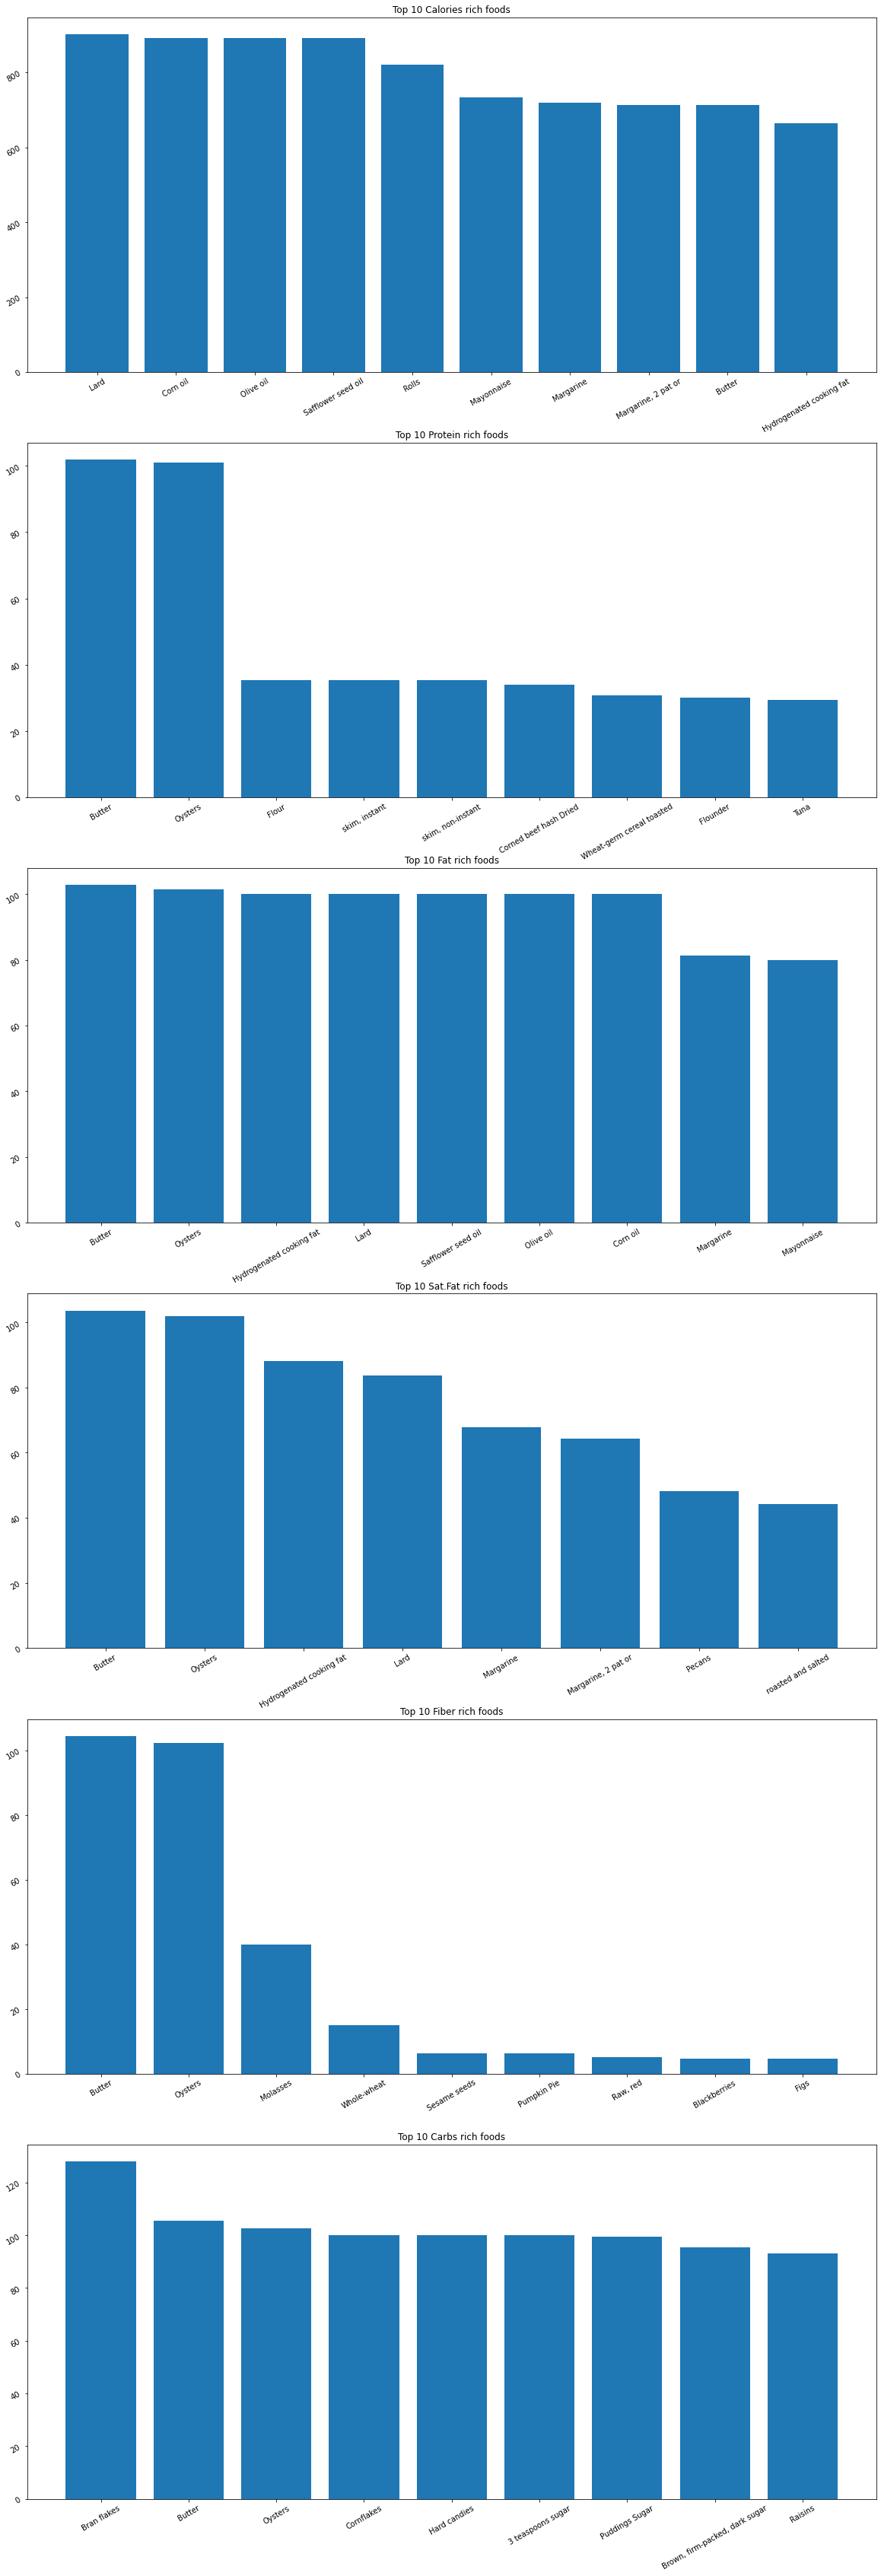

In [10]:
#--- TOP 10 FOODS ---#

# Plots a bar chart for the top 10 x foods
# Where x is in {'Calories', 'Protein', 'Fat', 'Sat. Fat', 'Fibre', 'Carbs'}

fig, ax = plt.subplots(6, 1, figsize=(20, 60))
for col in range (3,9):
    column = df.columns[col]
    top = df.sort_values(by=column, ascending= False).head(10)
    ax[col-3].bar(
        top['Food'],
        top[column]
    ) 
    ax[col-3].set_xlabel = 'Food'
    ax[col-3].set_ylabel = column
    ax[col-3].title.set_text('Top 10 '+ column + ' rich foods')
    ax[col-3].tick_params(labelrotation=30)
plt.show()

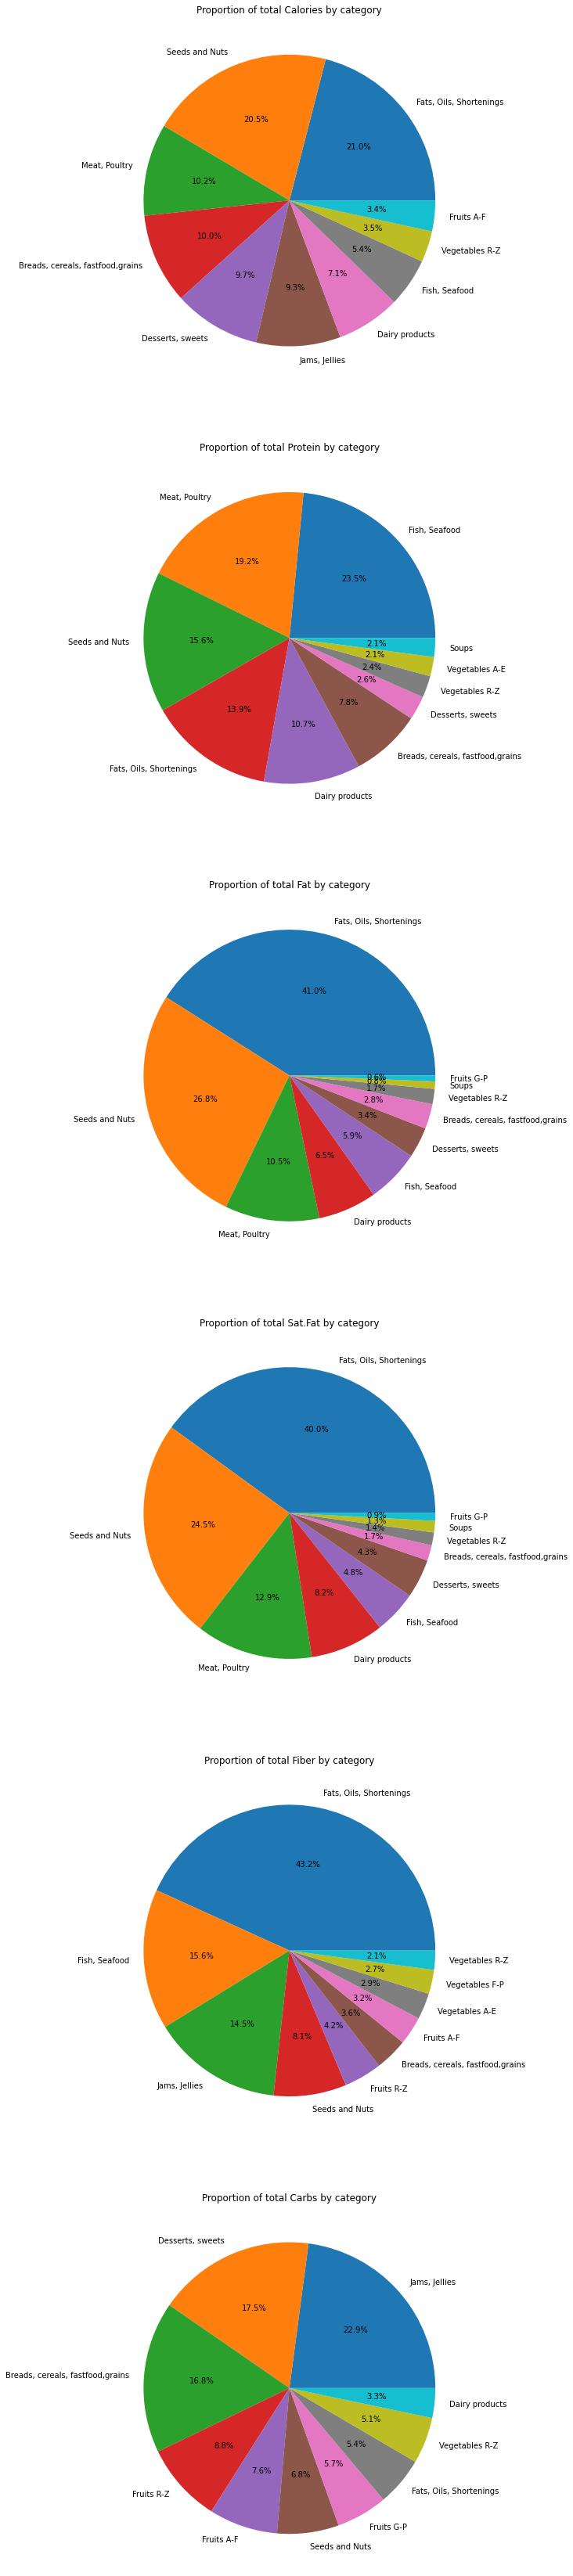

In [11]:
#--- FOOD CATEGORY VS NUTRIENTS ---#

# Plots a pie chart showing the proportion of each food category that makes up the total amount of x in the data 
# Where x is in {'Calories', 'Protein', 'Fat', 'Sat. Fat', 'Fibre', 'Carbs'}

groupedFoods = df.groupby('Category').mean()

fig, ax = plt.subplots(6, 1, figsize=(20, 60))
for col in range (1,7):
    column = groupedFoods.columns[col]
    top = groupedFoods.sort_values(by=column, ascending= False).head(10)
    ax[col-1].pie(
        x=top[column],
        labels=top.index, 
        autopct='%1.1f%%'
    )
    fig.set_facecolor('white')
    ax[col-1].title.set_text('Proportion of total ' + column + ' by category')

plt.show()

In [26]:
# Function: Gives the nutrients of the food
# Input: food, the desired food item you want the nutrients of in the data (including case sensitivity)
#        exact, a boolean to look for an exact match or foods containing the food string
# Output: Returns the nutrients as a dataframe

def foodNutrition(food, exact=False):
    if exact:
        foodNutrients = df.loc[df['Food'] == food]
        foodNutrients = foodNutrients[foodNutrients.columns[list([0])+list(range(3,9))]].transpose()
    else:
        foodNutrients = df[df['Food'].str.contains(food)]
        foodNutrients = foodNutrients[foodNutrients.columns[list([0])+list(range(3,9))]].transpose()
    return foodNutrients


# Function: Gives the nutrients of the food and how many it found
# Note that it searches for an exact match first and if no exact match is found then it will look for entries containing the food string
# Input: food, the desired food item you want the nutrients of in the data (including case sensitivity)
# Output: Returns the number of found entries and the nutrients of each as a dataframe

def foodFinder(food):
    count = 0
    foodNutrients = 0
    if (df['Food'].eq(food)).any():
        foodNutrients = foodNutrition(food, exact=True)
        count = 1
    elif (df['Food'].str.contains(food)).any():
        foodNutrients = foodNutrition(food)
        count = len(foodNutrients.columns)
    return count, foodNutrients


# Function: Plots a pie chart showing the proportion of the nutrients making up the food item
# Input: food, the desired food item you want the nutrients of in the data (including case sensitivity)

def foodNutritionPie(food=''):
    if food != '':
        count, foodNutrients = foodFinder(food)
        if count == 1:
            fig, pie = plt.subplots(figsize = (20,12))
            pie = plt.pie(
                x=foodNutrients[foodNutrients.columns[0]][2:],
                labels=foodNutrients.index[2:], 
                autopct='%1.1f%%'
            )
            fig.set_facecolor('white')
            plt.title('Nutrient breakdown of ' + foodNutrients[foodNutrients.columns[0]][0], bbox={'facecolor':'0.8', 'pad':5})
            plt.show()
        elif count > 1:
            fig, ax = plt.subplots(count, 1, figsize=(20, 12*count))
            for i in range (0,count):
                ax[i].pie(
                    x=foodNutrients[foodNutrients.columns[i]][2:],
                    labels=foodNutrients.index[2:], 
                    autopct='%1.1f%%'
                )
                fig.set_facecolor('white')
                ax[i].title.set_text('Nutrient breakdown of ' + foodNutrients[foodNutrients.columns[i]][0])
            plt.show()
        else:
            print("Food not recognised")
    else:
        print("No food entry")

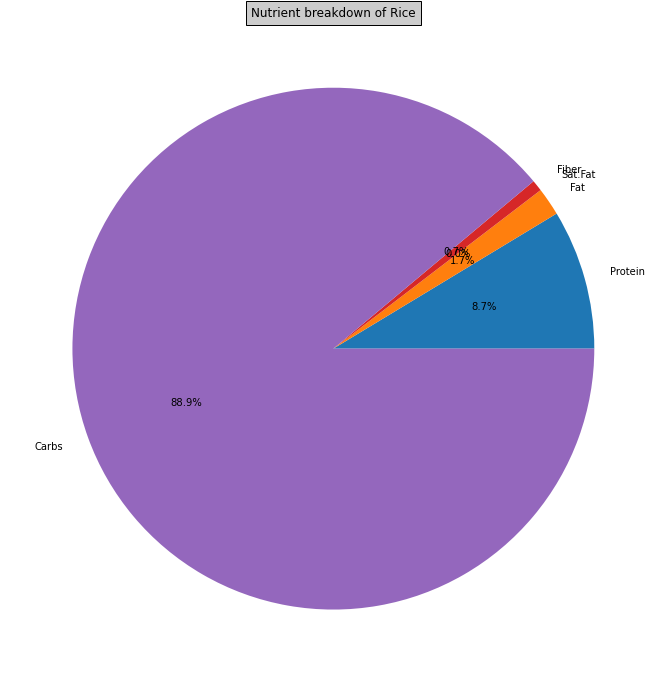

In [27]:
# Running the above function

#foodNutrition(food='qrq')

foodNutritionPie(food='Rice')

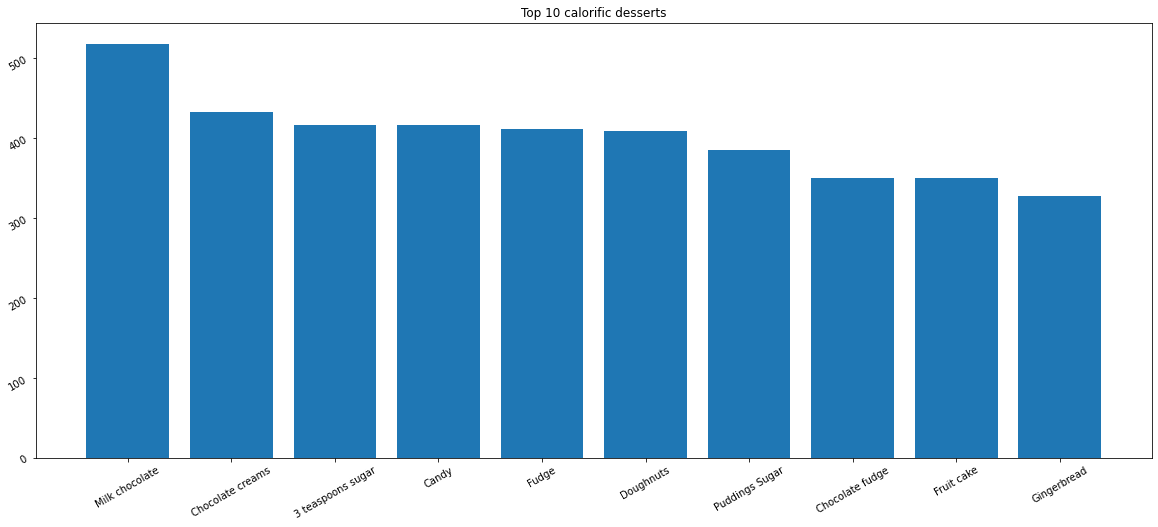

In [15]:
#--- DESSERTS VS CALORIES ---#

# Plots a bar chart showing the top 10 desserts in the data with the most calories

desserts = df.loc[df['Category'] == 'Desserts, sweets']
top = desserts.sort_values(by='Calories', ascending= False).head(10)
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(
    top['Food'],
    top['Calories']
)
ax.set_xlabel = 'Food'
ax.set_ylabel = 'Calories'
ax.title.set_text('Top 10 calorific desserts')
ax.tick_params(labelrotation=30)
plt.show()


We've seen a lot of interesting visualisations of the data and clearly much more can be done to visualise this data set.

Now, we will start using this data and the functions defined above for a more interactive and different purpose. Below will be a calculator for the nutrients of meal containing entries in the data, which could be useful for dieting and tracking macronutrients.

In [28]:
#--- BMI Calculator ---#

# Function: Defines what happens when the BMI_button widget is clicked
# Output: Calculates the BMI from the inputted data and returns it as a label

def on_BMI_button_click(b):
    try: 
        BMI = float(weight.value) / float(height.value) ** 2
        BMI_label.value = "BMI: " + str(BMI)
        
        if(BMI<18.5):
            BMIComment_label.value = "You are underwight."
        elif (BMI<=24.9):
            BMIComment_label.value = "You are normal weight."
        elif (BMI<29.9):
            BMIComment_label.value = "You are overweight."
        elif (BMI<34.9):
            BMIComment_label.value = "You are obese."
        elif (BMI<39.9):
            BMIComment_label.value = "You are severely obese."
        else:
            BMIComment_label.value = "You are morbidly obese."
    except:
        BMI_label.value = "Error!"


# Defining the widgets

height = widgets.BoundedFloatText(
    value = 1.7,
    min = 0,
    max = 3,
    description = 'Height (m):',
    disabled = False
)

weight = widgets.FloatText(
    value = 60,
    description = 'Weight (kg):',
    disabled = False
)

BMI_button = widgets.Button(
    description = 'Calculate'
)

BMI_label = widgets.Label()
BMIComment_label = widgets.Label()


# Calls the defined function above when BMI_button is clicked

BMI_button.on_click(on_BMI_button_click)


# Displays all the widgets

display(height, weight, BMI_button, BMI_label, BMIComment_label)

BoundedFloatText(value=1.7, description='Height (m):', max=3.0)

FloatText(value=60.0, description='Weight (kg):')

Button(description='Calculate', style=ButtonStyle())

Label(value='')

Label(value='')

In [29]:
#--- Food Search ---#

# Function: Defines what happens when the food_button widget is clicked
# Output: Calls foodNutritionPie() function defined earlier
# Note that this plots a pie chart of the nutrients found in the food (including case sensitivity)

def on_food_button_click(b):
    clear_output()
    display(foodText, food_button)
    foodNutritionPie(food=foodText.value)


# Defining the widgets

foodText = widgets.Text(
    description = 'Food:',
    disabled = False
)

food_button = widgets.Button(
    description = 'Enter'
)


# Calls the defined function above when food_button is clicked

food_button.on_click(on_food_button_click)


# Displays all the widgets
display(foodText, food_button)

Text(value='', description='Food:')

Button(description='Enter', style=ButtonStyle())

interactive(children=(Text(value='', description='food'), Output()), _dom_classes=('widget-interact',))

FloatText(value=0.0, description='Weight(g):')

Dropdown(description='Foods:', options=('',), value='')

Button(description='Add', style=ButtonStyle())

Button(description='Done', style=ButtonStyle())

Label(value='No food entry')

HTML(value='')

Calories    6.000000
Protein     0.133333
Fat         0.000000
Sat.Fat     0.000000
Fiber       0.120000
Carbs       1.333333
dtype: float64


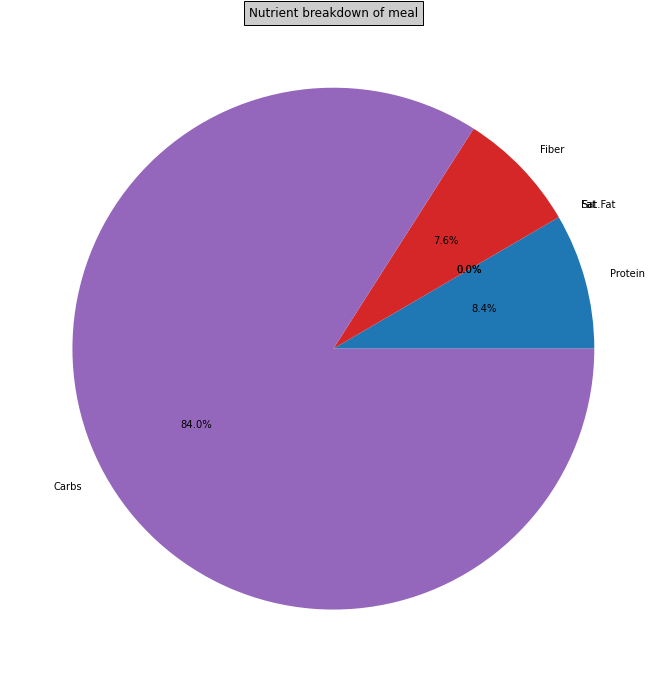

In [30]:
#--- Basic Recipe Nutrition Breakdown ---#

# Function: Defines what happens when the foodAddDone_button widget is clicked
# Output: Adds up all the nutrients in the list of food added and presents the data as a piechart. 

def on_foodAddDone_button_click(b):
    # Copies the list of food added so that we can manipulate it

    total = foodList.copy()


    # Makes sure that the nutrients of the food added correspond to the weight of the food added

    for col in range (1,7):
        total[total.columns[col]] = (foodList[foodList.columns[col]] * foodList['Grams']) / 100
    total = total[total.columns[1:7]].sum(axis=0, numeric_only=True).transpose()


    # Displays the calories of the meal
    # Note if the calculated calories is negative then it will print an error

    if total.iloc[0] >= 0:
        foodComment_label.value = 'Calories: ' + str(total.iloc[0])
    else:
        foodComment_label.value = 'Error: Your meal has negative calories!'
    

    # Displays the nutrients of the meal
    # Plots the piechart of the nutrients

    try:
        print(total)

        fig, pie = plt.subplots(figsize = (20,12))
        pie = plt.pie(
            x=total.iloc[1:],
            labels=total.index[1:], 
            autopct='%1.1f%%'
        )
        fig.set_facecolor('white')
        plt.title('Nutrient breakdown of meal', bbox={'facecolor':'0.8', 'pad':5})
        plt.show()
    except:
        foodComment_label.value = 'Error: Your meal nutrients are impossible!'


# Function: Defines what happens when the foodAdd_button widget is clicked
# Output: Adds the food selected in the droplist onto the recipe list

def on_foodAdd_button_click(b):
    if foods_dropdown.value != '': 
        foodNutrients = foodNutrition(foods_dropdown.value, exact=True)
        foodAdded_label.value += str(foodWeight_Text.value) + 'g of ' + foodNutrients.iloc[0,0] + '<br>'
        foodList.loc[len(foodList)] = foodNutrients.iloc[:,0].transpose()
        foodList.iloc[len(foodList)-1, -1] = foodWeight_Text.value
        #print(foodList)


# Function: Updates the droplist according to the input
# Output: Changes the options of selectable food based on the input

def foodDrop(food):
    foodComment_label.value = ''
    foods_dropdown.options = ['']
    foods_dropdown.value = ''
    if food != '':   
        count, foodNutrients = foodFinder(food)
        if count > 0:
            foods_dropdown.options = foodNutrients.iloc[0]
        else:
            foodComment_label.value = "Food not recognised"
    else:
        foodComment_label.value = "No food entry"


# Defining the widgets

foodAdd_Text = widgets.Text(
    description = 'Food:',
    disabled = False
)

foodWeight_Text = widgets.FloatText(
    description = 'Weight(g):',
    disabled = False
)

foodAdd_button = widgets.Button(
    description = 'Add'
)

foodAddDone_button = widgets.Button(
    description = 'Done'
)

foods_dropdown = widgets.Dropdown(
    description='Foods:',
    disabled = False
)

foodAdded_label = widgets.HTML(
    value=""
)
foodComment_label = widgets.Label()


# Calls the defined function above when the foodAdd_Text textbox is edited to update the droplist

foodSearch = widgets.interactive(foodDrop, food = foodAdd_Text.value)


# Calls the defined function above when foodAdd_button is clicked

foodAdd_button.on_click(on_foodAdd_button_click)


# Calls the defined function above when foodAddDone_button is clicked

foodAddDone_button.on_click(on_foodAddDone_button_click)


# Sets the meal recipe list with columns corresponding to the different nutrients and weight of the food entries

foodList = pd.DataFrame(columns=list(df[df.columns[list([0])+list(range(3,9))]].columns) + list(["Grams"]))


# Displays all the widgets

display(foodSearch, foodWeight_Text, foods_dropdown, foodAdd_button, foodAddDone_button, foodComment_label, foodAdded_label)